In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)

In [2]:
Tref=773
lx=340
ly=150
endTime=0.1
timeStep=0.01
MCoke=12
MO2=32
pixelResolution=1e-6
YO2=0.22

- tiny 2: base
- tiny 2_1: the specific capacities of all the species are the same
- tiny 2_2: top and bottom B.C. are periodic 

## Compare the combustion temperature

In [3]:
def reaMinMaxFile(fieldminMaxFile):
    with open(fieldminMaxFile,"r") as fp:
        comment=fp.readline()
        header=fp.readline()
    header=header[1:-1].split()
    indexs_processor=[]
    for i,name in enumerate(header):
        if header[i]=="processor":
            indexs_processor.append(i)
    indexs_processor.reverse()  

    data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
    data=data.drop(indexs_processor,axis=1)
    data.rename(columns=lambda x:header[x],inplace=True)
    return data

In [4]:
df_tiny2=reaMinMaxFile(r"./tiny2/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,772.9158,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(1.855000e-04 6.950000e-05 5.000000e-07)
1,2.640000e-09,T,772.8225,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(4.750000e-05 1.350000e-05 5.000000e-07)
2,4.367999e-09,T,772.7211,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(4.750000e-05 1.350000e-05 5.000000e-07)
3,6.441599e-09,T,772.6131,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(4.750000e-05 1.350000e-05 5.000000e-07)
4,8.929917e-09,T,772.5011,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(1.135000e-04 3.450000e-05 5.000000e-07)


In [5]:
df_tiny2_1=reaMinMaxFile(r"./tiny2_1/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_1.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(6.550000e-05 7.550000e-05 5.000000e-07)


In [6]:
df_tiny2_2=reaMinMaxFile(r"./tiny2_2/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_2.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 5.250000e-05 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 5.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(5.250000e-05 6.250000e-05 5.000000e-07)


Text(0, 0.5, 'Dimensionless T')

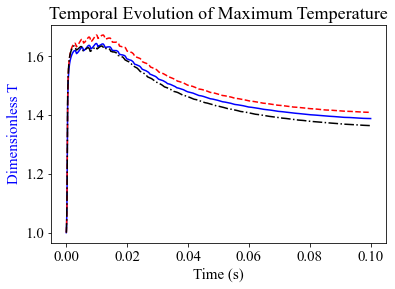

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel(f"Time (s)")
ax.set_title(f"Temporal Evolution of Maximum Temperature",color="k")

ax.plot(df_tiny2["Time"],df_tiny2["max"]/Tref,linestyle="-",label="Tiny 2",color="b")
ax.plot(df_tiny2_1["Time"],df_tiny2_1["max"]/Tref,linestyle="--",label="Tiny 2-1",color="r")
ax.plot(df_tiny2_2["Time"],df_tiny2_2["max"]/Tref,linestyle="-.",label="Tiny 2-2",color="k")
ax.set_ylabel(f"Dimensionless T",color="b")

Text(0, 0.5, 'Dimensionless T')

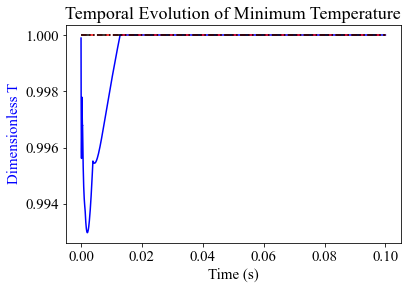

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel(f"Time (s)")
ax.set_title(f"Temporal Evolution of Minimum Temperature",color="k")

ax.plot(df_tiny2["Time"],df_tiny2["min"]/Tref,linestyle="-",label="Tiny 2",color="b")
ax.plot(df_tiny2_1["Time"],df_tiny2_1["min"]/Tref,linestyle="--",label="Tiny 2-1",color="r")
ax.plot(df_tiny2_2["Time"],df_tiny2_2["min"]/Tref,linestyle="-.",label="Tiny 2-2",color="k")
ax.set_ylabel(f"Dimensionless T",color="b")